In [4]:
#%matplotlib inline
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
#plotting, style
from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex
from array import array
#SetAtlasStyle()
ROOT.gStyle.SetPalette(ROOT.kViridis);


### Get Data and MC files

In [25]:
#pp
#Datafile = ROOT.TFile('/home/dhruv/fout_16_17p_CENT_wSDD_MB_v1_mini_pp_allevents_forTrackEff_etaPhi_1GeV20GeV_wTrig.root')
#MCfile = ROOT.TFile('/home/dhruv/TrackEfficiency_pp_1GeV20GeV_etaphi_2M.root')

#Datafile = ROOT.TFile('/home/dhruv/fout_16_17p_CENT_wSDD_MB_v1_mini_pp_allevents_forTrackEff_etaPhi_1GeV20GeV.root')

#Datafile = ROOT.TFile('/home/dhruv/fout_16_17p_CENT_wSDD_MB_v1_pPb_1GeV16GeV_trig_zv_all_new.root')

#MCfile = ROOT.TFile('/home/dhruv/18b10ab_16_5L_allpthat_zv.root')
#MCfile = ROOT.TFile('/home/dhruv/17g6a3_16_noZvCut_1GeV16GeV_4L.root')
#MCfile = ROOT.TFile('/home/dhruv/18b10ab_16_noZvCut_20GeV_4L.root')
#Datafile = ROOT.TFile('/home/dhruv/fout_16_17p_CENT_wSDD_v1_2run_pp_20GeV_trig_pileup_zv_all_4layers_new.root')

MCfile = ROOT.TFile('/home/dhruv/17l4_16_9bins_1GeV20GeV_4L_Allevents.root')
#MCfile = ROOT.TFile('/home/dhruv/17l4_16_9bins_1GeV20GeV_200Mevents_lowptEta.root')
Datafile = ROOT.TFile('/home/dhruv/fout_16_17p_CENT_wSDD_v1_2run_pp_minBiasTrigg_Allevents.root')

#MCfile = ROOT.TFile('/home/dhruv/17l4_3_9bins_1GeV20GeV_4L_Allevents.root')
#Datafile = ROOT.TFile('/home/dhruv/fout_3_17p_CENT_wSDD_v1_2run_pp_minBiasTrigg_Allevents.root')



### Get response Matrix and plot it, also true/reco ratio

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


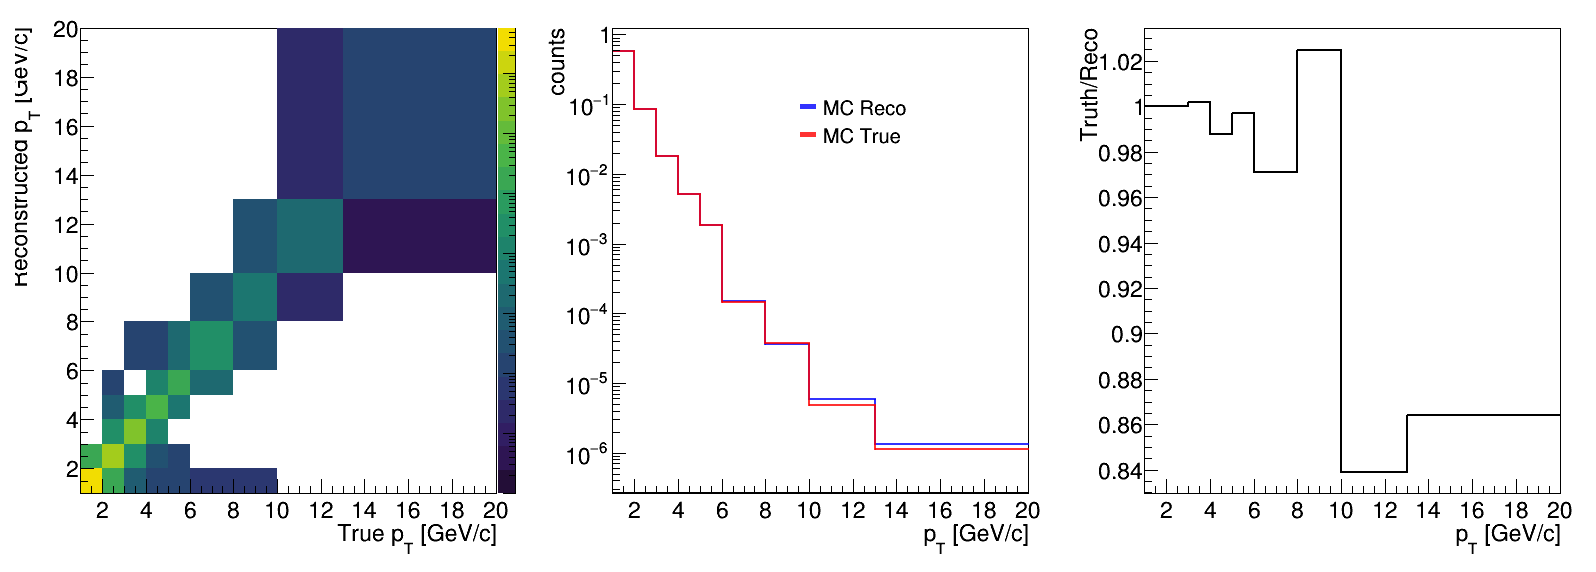

In [46]:
responseMatrix = MCfile.Get("hCorrelation_cor");

#responseMatrix.Rebin2D(2,2)
responseMatrix.ClearUnderflowAndOverflow()
        
mc_truth = responseMatrix.ProjectionX()
mc_reco = responseMatrix.ProjectionY()
for i in range(mc_truth.GetNbinsX()):
    binWidth = mc_truth.GetBinWidth(i)
    binCon_truth = mc_truth.GetBinContent(i)
    binCon_reco = mc_reco.GetBinContent(i)
    mc_truth.SetBinContent(i, binCon_truth/binWidth)
    mc_reco.SetBinContent(i, binCon_reco/binWidth)
mc_truth.Sumw2()
mc_reco.Sumw2()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(3)
c.cd(1)
responseMatrix.Draw('colz')
responseMatrix.SetMinimum(1e-8)
ROOT.gPad.SetLogz()
c.cd(2)

label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
hs_mc.SetTitle('; p_{T} [GeV/c]; counts')

label.Draw(0.5,.87)
ROOT.gPad.SetLogy()
c.cd(3)
ratio_mc = mc_truth.Clone()
ratio_mc.SetLineColor(1)
ratio_mc.Divide(mc_reco)
ratio_mc.Draw('e')
ratio_mc.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')
c.Draw()
#c.SaveAs('Matrix_tracking_pp_its.png')

### Get measured track pt spectrum

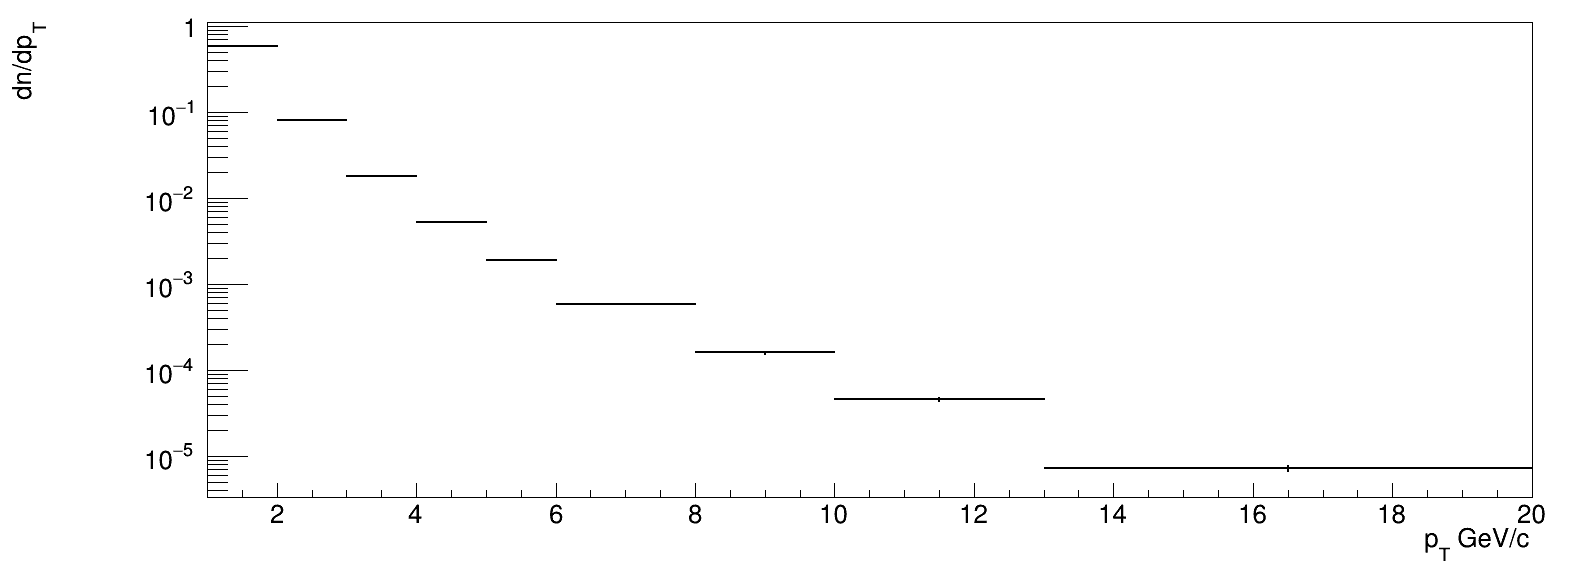

In [47]:
data = Datafile.Get('hReco')
data.ClearUnderflowAndOverflow()
numEvents = 747090.0 #pp events
max_eta = 1.6
#data.Scale(1/(numEvents*max_eta))
#for i in range(data.GetNbinsX()):
#    data_content = data.GetBinContent(i+1)
#    data.SetBinContent(i+1, data_content/(numEvents*max_eta))
#    data_errors = data.GetBinError(i+1)
#    data.SetBinError = (i+1, data_errors/(numEvents*max_eta))

c.Clear()
data.Draw()
ROOT.gPad.SetLogy()
c.Draw()
#c.SaveAs('dataSpectrum_tracking_pp_its.png')

### Get and plot efficiency and fake rate


****************************************
Minimizer is Linear
Chi2                      =      10.3935
NDf                       =            7
p0                        =     0.854556   +/-   0.0013632   


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


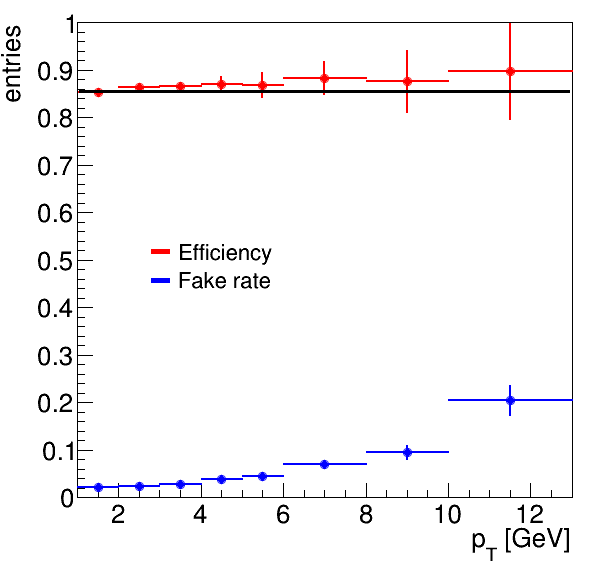

In [26]:
#Get efficiency and fake rate
efficiency = MCfile.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency.Divide(MCfile.Get("hTruth"))
fakerate   = MCfile.Get("FakeRate")
fakerate   = MCfile.Get("FakeRate")

#Plot efficiency and fake rate
efficiency.SetTitle(' ; p_{T} [GeV]')
efficiency.SetMinimum(0.0)
efficiency.SetMaximum(1.0)
efficiency.SetMarkerStyle(20)
efficiency.SetMarkerColor(2)
efficiency.SetLineColor(2)
efficiency.GetXaxis().SetRangeUser(1,13)
fakerate.SetMarkerStyle(20)
fakerate.SetLineColor(4)
fakerate.SetMarkerColor(4)

c = ROOT.TCanvas('c','c',600,600)
efficiency.Fit('pol0', '', '', 1,20)
efficiency.Draw()
fakerate.Draw('same')

label = Legend("")
label.Add(efficiency,'Efficiency','L')
label.Add(fakerate,'Fake rate','L')
label.Draw(.25,.61)
c.Draw()
#c.SaveAs('EfficiencyAndFakeRate_tracking.png')

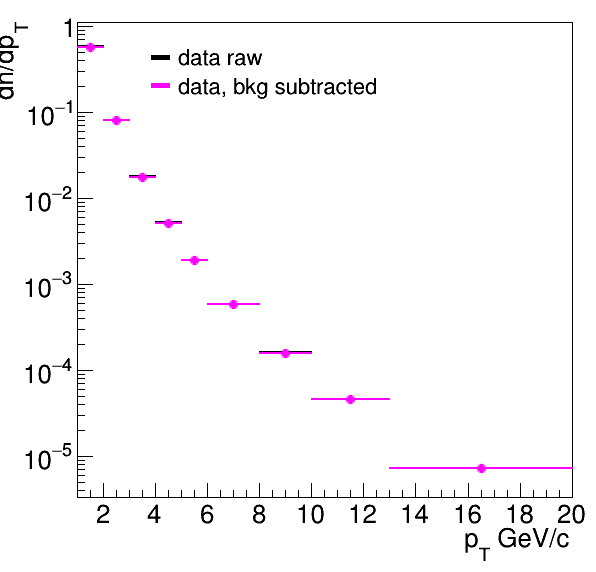

In [49]:
data_bkgsub = data.Clone()
for i in range(1,fakerate.GetNbinsX()+1):
    bkg = data.GetBinContent(i)*fakerate.GetBinContent(i)
    data_bkgsub.SetBinContent(i,data.GetBinContent(i)-bkg)

c.Clear()
data.Draw()
data_bkgsub.SetLineColor(ROOT.kMagenta)
data_bkgsub.SetMarkerColor(ROOT.kMagenta)
data_bkgsub.SetMarkerStyle(20)

data_bkgsub.Draw('same')
ROOT.gPad.SetLogy()
label = Legend("")
label.Add(data,'data raw','L')
label.Add(data_bkgsub,'data, bkg subtracted','L')
label.Draw(.25,.95)
c.Draw()
#c.SaveAs('FakeRake_sub_tracking.png')


### DEFINE DATA FOR UNFOLDING 

In [50]:
data_inputforunfolding = data_bkgsub.Clone()
#data_inputforunfolding = data.Clone()

### UNFOLDING 

In [51]:
response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix)
response.UseOverflow(ROOT.kFALSE)
data_unfolded = {}
#for tau in range(4,6):
#    data_unfolded['SVD%i'%tau] = RooUnfoldSvd(response, data_inputforunfolding, tau).Hreco();
   
data_unfolded['SVD8'] = RooUnfoldSvd(response, data_inputforunfolding, 6).Hreco();
data_unfolded['SVD9'] = RooUnfoldSvd(response, data_inputforunfolding, 7).Hreco();

print data_unfolded

{'SVD9': <ROOT.TH1D object ("hCorrelation_cor") at 0x5f8c680>, 'SVD8': <ROOT.TH1D object ("hCorrelation_cor") at 0x5fdec70>}
Subtract -0.000191835 fakes from measured distribution
SVD init 9 x 9 bins, kreg=6
Subtract -0.000191835 fakes from measured distribution
SVD init 9 x 9 bins, kreg=7


Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 6
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.565081
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH2D::Sumw2>: Sum of squares of weights structure already created
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 7
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 1.608659


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


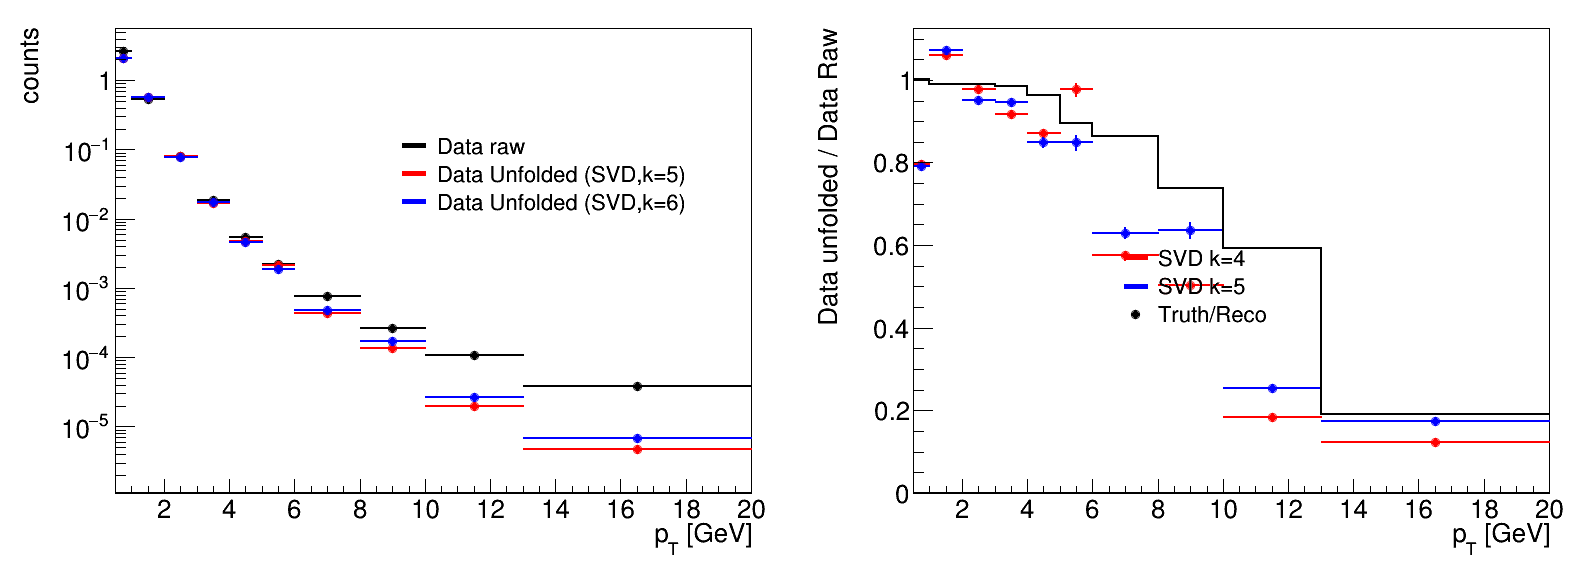

In [100]:
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hstack = ROOT.THStack()
hstack.Add(data)
label.Add(data,'Data raw','L')

data.SetMarkerStyle(20)
data_unfolded['SVD8'].SetLineColor(2)
data_unfolded['SVD8'].SetMarkerColor(2)
data_unfolded['SVD8'].SetMarkerStyle(20)
data_unfolded['SVD9'].SetLineColor(4)
data_unfolded['SVD9'].SetMarkerColor(4)
data_unfolded['SVD9'].SetMarkerStyle(20)

hstack.Add(data_unfolded['SVD8'])
hstack.Add(data_unfolded['SVD9'])
label.Add(data_unfolded['SVD8'], 'Data Unfolded (SVD,k=5)','L')
label.Add(data_unfolded['SVD9'], 'Data Unfolded (SVD,k=6)','L')
               
hstack.SetTitle('; p_{T} [GeV]; counts')
hstack.Draw('nostack')
ROOT.gPad.SetLogy()
label.Draw(.5,.8)
c.cd(2)

hs_ratio = ROOT.THStack()
label = Legend("")

ratio = {}
ratio['SVD8'] = data_unfolded['SVD8'].Clone()
ratio['SVD8'].Divide(data) 
ratio['SVD9'] = data_unfolded['SVD9'].Clone()
ratio['SVD9'].Divide(data) 

hs_ratio.Add( ratio['SVD8'])
hs_ratio.Add( ratio['SVD9'])

label.Add(ratio['SVD8'],'SVD k=4','L')
label.Add(ratio['SVD9'],'SVD k=5','L')

#simple bin-by-bin unfolding
ratio_mc.SetMarkerStyle(20)
ratio_mc.SetMarkerSize(1)
ratio_mc.SetMarkerColor(1)

hs_ratio.Add(ratio_mc)

hs_ratio.SetTitle('; p_{T} [GeV]; Data unfolded / Data Raw')
hs_ratio.Draw('nostack')
label.Add(ratio_mc, 'Truth/Reco','P')
label.Draw(.4,.6)
c.Draw()
#c.SaveAs('Unfoldedresult_tracking.png')

#Correcting for efficiency


In [86]:
##EFFICIENCY CORRECTION

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


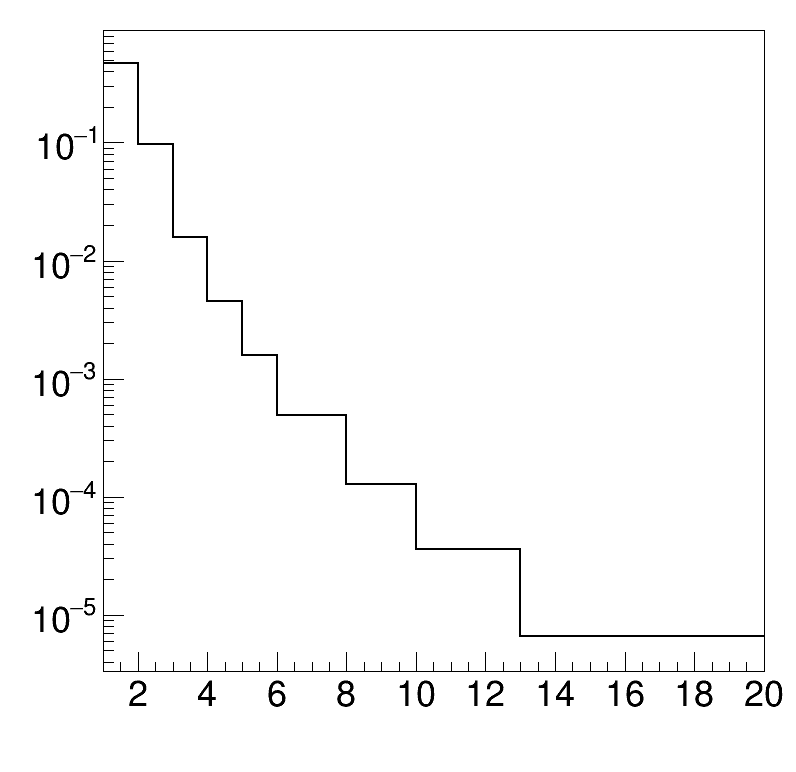

In [52]:
#pp published data
pp_bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0]
binned_data = [4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03 , 1.59E-03 , 4.90E-04, 1.27E-04, 3.64E-05, 6.66E-06]
h = ROOT.TH1F('binned_data', '', 9, array('d',pp_bins))
for i in range (len(binned_data)):
    h.SetBinContent(i+1,binned_data[i])
    h.SetBinError(i+1,0.0)

c= ROOT.TCanvas('c','c',800,800)
h.Draw('hist')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


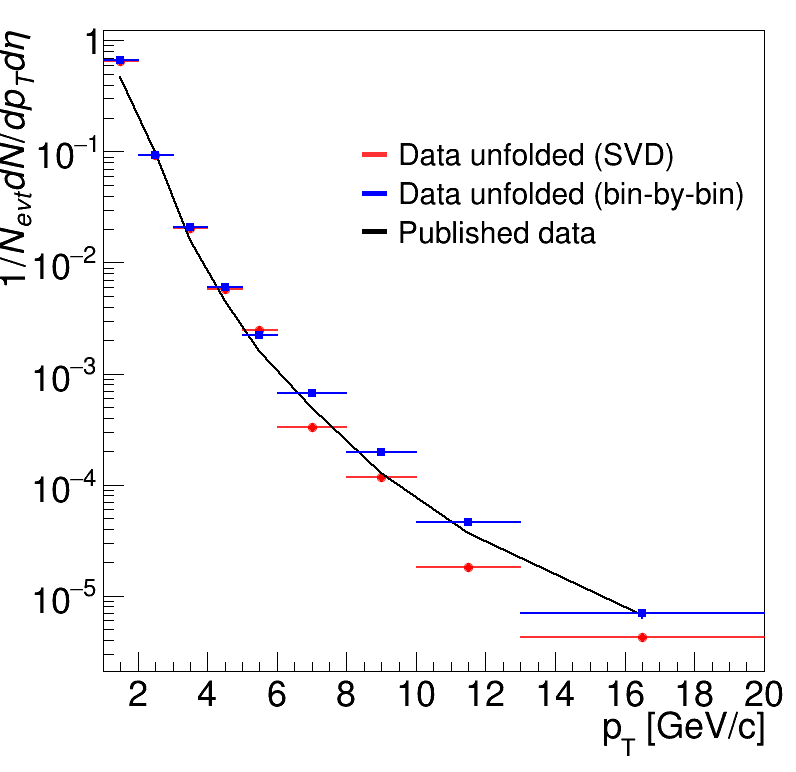

In [53]:
#efficiency.Print()
#applying efficiency
def applyEfficiencyCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)/eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)/eff)
    return histo_corrected


data_unfolded_SVD_4_corrected = applyEfficiencyCorrection(data_unfolded['SVD8'])
data_unfolded_SVD_5_corrected = applyEfficiencyCorrection(data_unfolded['SVD9'])

data_corrected = data.Clone()
data_onlyeff   = data.Clone()

data_corrected.Multiply(ratio_mc) #applying "naive unfolding"
data_onlyeff = applyEfficiencyCorrection(data_onlyeff)


data_corrected= applyEfficiencyCorrection(data_corrected)
c= ROOT.TCanvas('c','c',800,800)
#c.Divide(2)
#c.cd(1)
data_unfolded_SVD_4_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_unfolded_SVD_4_corrected.SetMarkerStyle(20)
data_unfolded_SVD_4_corrected.SetMarkerColor(2)
#data_unfolded_SVD_4_corrected.GetXaxis().SetRangeUser(1,12)
data_unfolded_SVD_4_corrected.Draw()
data_unfolded_SVD_5_corrected.SetMarkerStyle(21)
data_unfolded_SVD_5_corrected.SetMarkerColor(ROOT.kOrange+1)
data_unfolded_SVD_5_corrected.SetLineColor(ROOT.kOrange+1)
#data_unfolded_SVD_5_corrected.Draw('same')
h.Draw('histLsame')
data_corrected.SetTitle('; p_{T} [GeV/c]; 1/N_{evt} dN/dp_{T}d\eta')
data_corrected.SetMarkerColor(4)
data_corrected.SetLineColor(4)
#data_corrected.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_onlyeff.SetLineColor(3)
data_onlyeff.SetMarkerColor(3)
data_onlyeff.SetMarkerStyle(21)
#data_onlyeff.Draw('histsame')
data_corrected.SetMarkerStyle(21)
data_corrected.Draw('same')

label = Legend("")
label.Add(data_unfolded_SVD_4_corrected,'Data unfolded (SVD)','L')
label.Add(data_corrected,'Data unfolded (bin-by-bin)','L')
#label.Add(data_unfolded_SVD_5_corrected,'Data unfolded (SVD k=5) + eff corr.','L')
label.Add(h,'Published data','L')
#label.Add(data_onlyeff,'Data + eff corr.','L')
#label.Add(data_corrected,'Data unfolded (bin-by-bin) + eff corr.','L')
label.Draw(.45,.85)

ROOT.gPad.SetLogy()



#c.SaveAs('UnfoldedSpectraAndPublishedResult_tracking.png')
c.Draw()

In [54]:
def printHisto(histo):
    values = []
    for i in range(1,histo.GetNbinsX()+1):
        width = histo.GetBinWidth(i)/2.0
        center = histo.GetBinCenter(i)
        content = histo.GetBinContent(i)
        #print '%2.2f--%2.2f = %2.5f, %2.5f' %(center-width,center+width,content, content*width*2.0)
        #print '%2.5f' %(content*width*2.0)
        #print '%2.2f--%2.2f' %(center-width,center+width)
        #print '%2.5f' %(content)
        values.append(content)
    print ' '
    return values


In [55]:
ratio_data_unfolded_SVD_4_corrected = data_unfolded_SVD_4_corrected.Clone()
ratio_data_unfolded_SVD_5_corrected = data_unfolded_SVD_5_corrected.Clone()
ratio_data_corrected                = data_corrected.Clone()
ratio_unity                         = h.Clone()

ratio_data_unfolded_SVD_4_corrected.Divide(h)
ratio_data_unfolded_SVD_5_corrected.Divide(h)
ratio_data_corrected.Divide(h)
ratio_unity.Divide(h)

True

In [56]:
ratio_data_raw = data.Clone()
ratio_data_raw.Divide(h)
ratio_data_bkgsub = data_bkgsub.Clone()
ratio_data_bkgsub.Divide(h)

ratio_data_unfoldedSVD4 = data_unfolded['SVD8'].Clone()
ratio_data_unfoldedSVD4.Divide(h)


True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


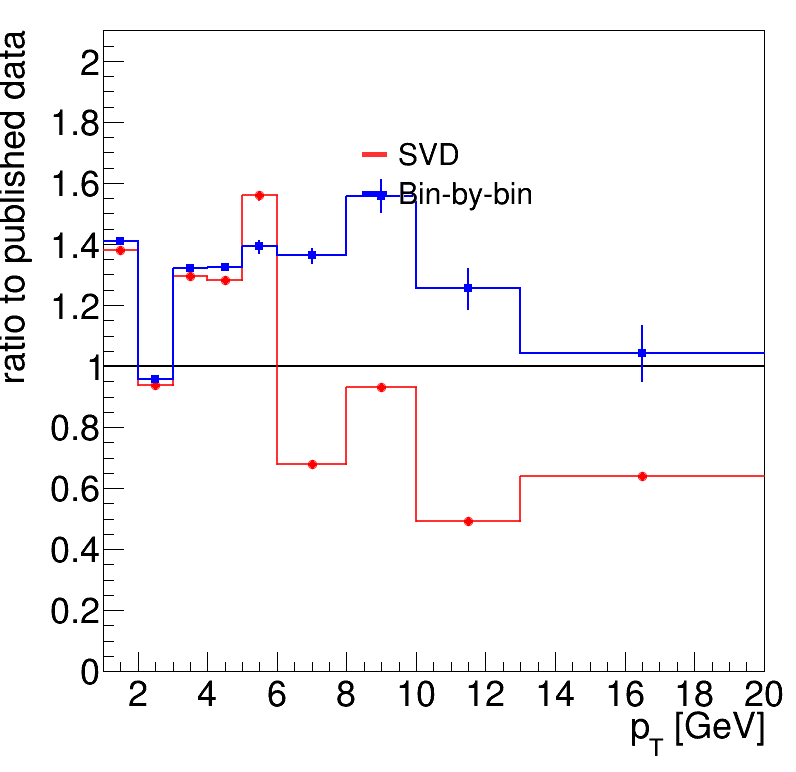

In [57]:
c= ROOT.TCanvas('c','c',800,800)


ratio_unity.Draw("histsame")
ratio_unity.SetTitle('; p_{T} [GeV]; ratio to published data')
ratio_unity.SetTitle('Data unfolded / Published data')
#ratio_unity.SetMaximum(2.0)
#ratio_unity.SetMinimum(0.0)
ratio_data_unfolded_SVD_4_corrected.Draw('histesame')
#ratio_data_unfolded_SVD_5_corrected.Draw('histsame')
ratio_data_corrected.Draw('hisetsame')
#ratio_data_raw.Draw("histsame")
#ratio_data_bkgsub.Draw("histsame")
#ratio_data_unfoldedSVD4.Draw("histsame")

label = Legend("")
label.Add(ratio_data_unfolded_SVD_4_corrected,'SVD','L')
#label.Add(ratio_data_unfolded_SVD_5_corrected,'SVD k=5 + eff corr.','L')
label.Add(ratio_data_corrected,'Bin-by-bin','L')
label.Draw(.45,.85)

c.Draw()
#c.SaveAs('Comparison_Unfolded_tracking.png')


In [58]:
##Refolding

In [59]:
##refolding the distribution:
def applyEfficiencyUnCorrection(histo):
    histo_corrected = histo.Clone()
    for i in range(1,histo.GetNbinsX()+1):
        pt = ROOT.Double()
        eff = ROOT.Double()
        efficiency.GetPoint(i-1,pt,eff)
        #print pt, eff
        histo_corrected.SetBinContent(i,histo.GetBinContent(i)*eff)
        histo_corrected.SetBinError(i,histo.GetBinError(i)*eff)
    return histo_corrected

for i in range(responseMatrix.GetNbinsX()):
    ySliceSum = float(0.0)
    for j in range(responseMatrix.GetNbinsY()):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        ySliceSum = ySliceSum + tempCont
    print "ySliceSum = ", ySliceSum, "bin: ", i+1
    for j in range (responseMatrix.GetNbinsY()+1):
        tempCont = responseMatrix.GetBinContent(i+1, j+1)
        newCont = tempCont/ySliceSum
        responseMatrix.SetBinContent(i+1, j+1, newCont)
        

# h=published data 
h_wEff = applyEfficiencyUnCorrection(h)
h_wEff.SetLineColor(ROOT.kRed)
N = h_wEff.GetNbinsX()#data_unfolded['SVD8'].GetNbinsX()


data_refolded= h_wEff.Clone()#data_unfolded['SVD9'].Clone()
data_refolded.SetLineColorAlpha(4,0.5)

for ireco in range(1,N+1):
    temp = 0
    for itruth in range(1,N+1):
        #print responseMatrix.GetBinContent(itruth,ireco)
        #print data_unfolded['SVD'].GetBinContent(itruth)
        temp += responseMatrix.GetBinContent(itruth,ireco)*h_wEff.GetBinContent(itruth)
    data_refolded.SetBinContent(ireco, temp)
 
integralBins = 1

#print h_wEff.Integral(integralBins,N)
#print data_refolded.Integral(integralBins,N)
#print h_wEff.Integral(integralBins,N)/data_refolded.Integral(integralBins,N)
#data_refolded.Scale(h_wEff.Integral(integralBins,N)/data_refolded.Integral(integralBins,N))
#print data_refolded.Integral(integralBins,N)


ySliceSum =  0.58157214243 bin:  1
ySliceSum =  0.0852646939728 bin:  2
ySliceSum =  0.0182432186974 bin:  3
ySliceSum =  0.00514035399726 bin:  4
ySliceSum =  0.00183402407276 bin:  5
ySliceSum =  0.000291070082227 bin:  6
ySliceSum =  7.44944733526e-05 bin:  7
ySliceSum =  1.46155541074e-05 bin:  8
ySliceSum =  1.14062207501e-06 bin:  9


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


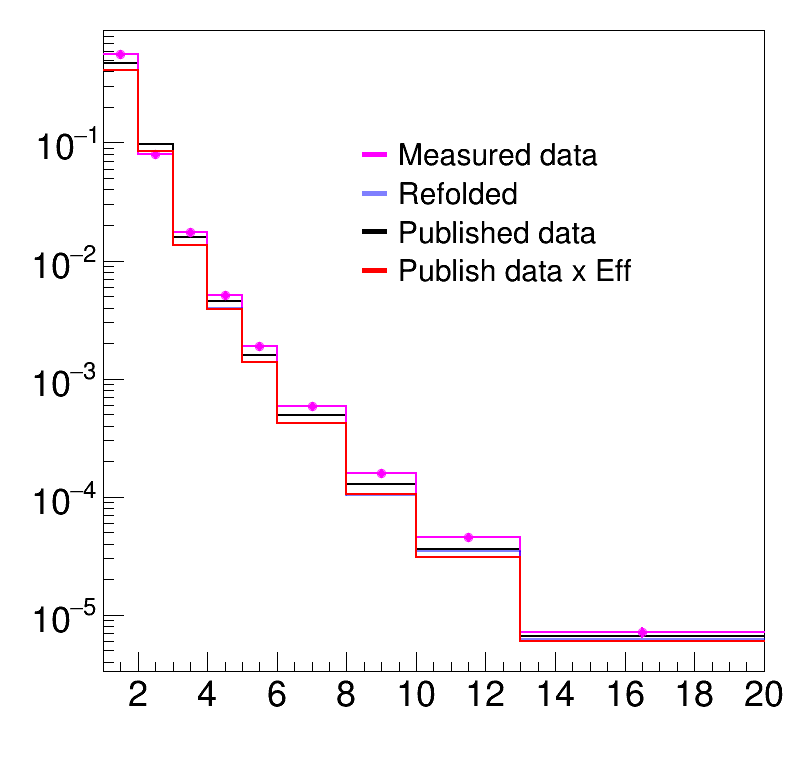

In [60]:
#plotting the refolded results
c= ROOT.TCanvas('c','c',800,800)
data.SetLineColor(ROOT.kMagenta)

h.Draw()
data_bkgsub.Draw('histesame')
data_refolded.Draw('histesame')
h_wEff.Draw('histesame')

label = Legend("")
label.Add(data_bkgsub,'Measured data','L')
label.Add(data_refolded,'Refolded','L')
label.Add(h,'Published data','L')
label.Add(h_wEff,'Publish data x Eff','L')
label.Draw(.45,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('refolding_pp_noLog.png')

In [61]:
ratio_refold_pub = h_wEff.Clone()
ratio_refold_pub.Divide(data_refolded)

ratio_refold_data = data_bkgsub.Clone()
ratio_refold_data.Divide(data_refolded)

ratio_unity = h.Clone()
ratio_unity.Divide(h)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


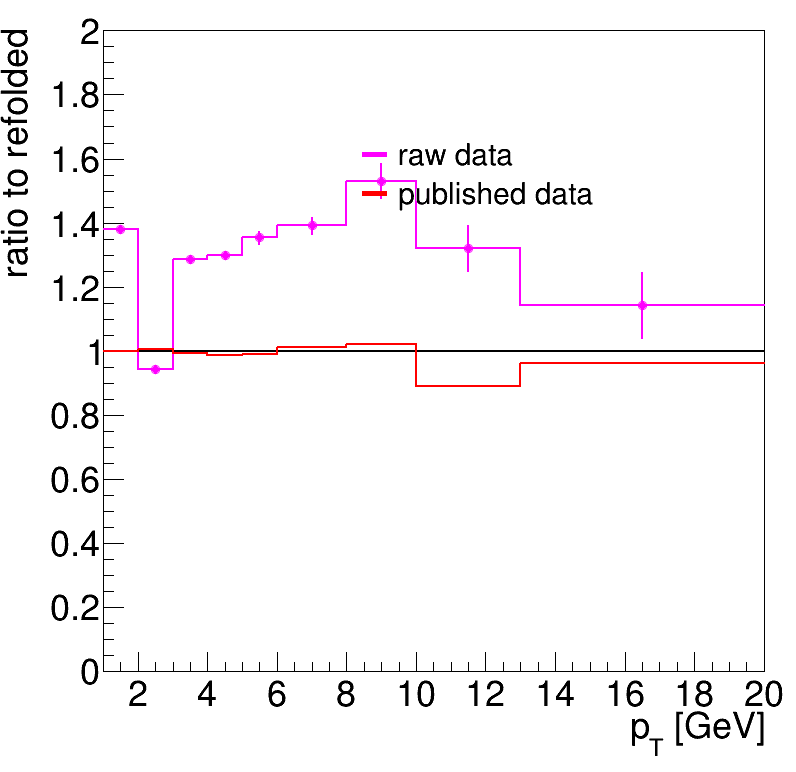

In [63]:
c= ROOT.TCanvas('c','c',800,800)

ratio_unity.Draw('hist')
ratio_unity.SetTitle('; p_{T} [GeV]; ratio to refolded')
ratio_unity.SetTitle('Data unfolded / Published data')
ratio_unity.SetMaximum(2.0)
ratio_unity.SetMinimum(0.0)
#ratio_unity.GetXaxis().SetRangeUser(0.5,12)
#ratio_refold_unfoldedSVD.Draw('histsame')
ratio_refold_data.Draw('hisetsame')
ratio_refold_pub.Draw('histesame')

label = Legend("")
label.Add(ratio_refold_data,'raw data','L')
label.Add(ratio_refold_pub,'published data','L')
label.Draw(.45,.85)


c.Draw()
#c.SaveAs('ratio_refolding_pp_5L_new.png')

# Eta Phi Comparison

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


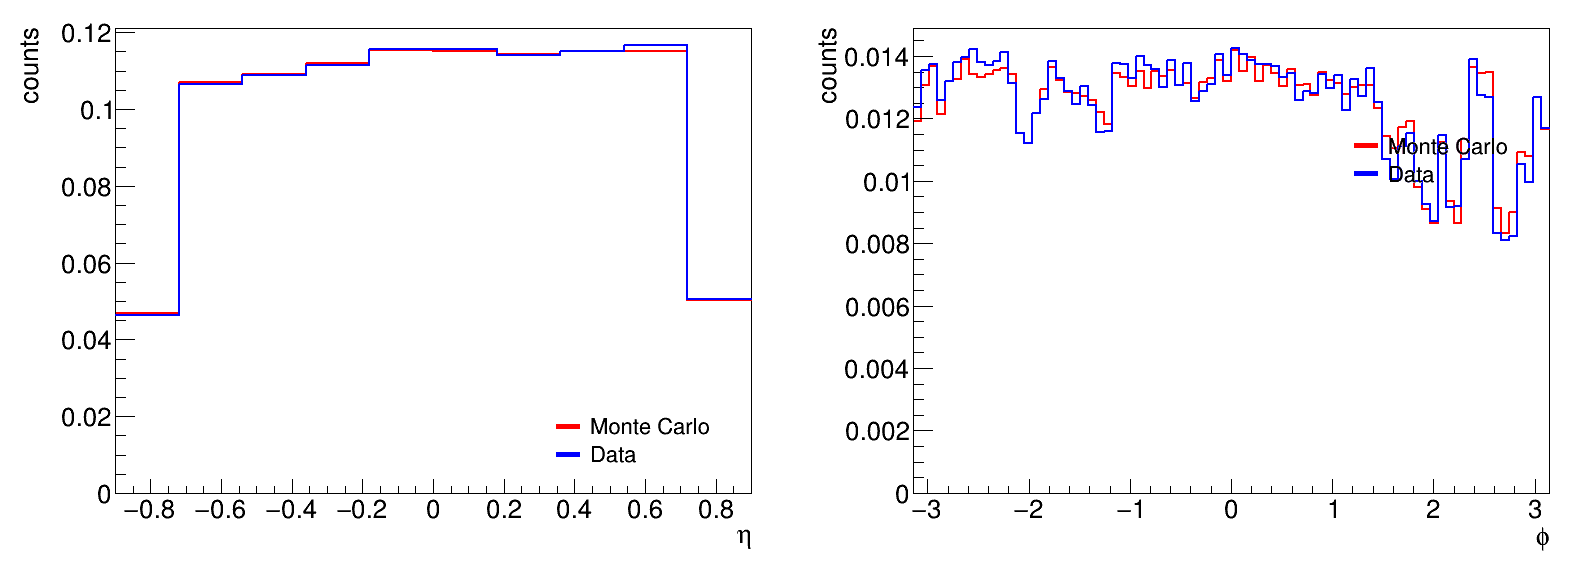

In [71]:
hEtaMC = MCfile.Get('hReco_eta')
hPhiMC = MCfile.Get('hReco_phi')

hEtaData = Datafile.Get('hReco_eta')
hPhiData = Datafile.Get('hReco_phi')

#hEtaMC.Scale(hEtaData.Integral()/hEtaMC.Integral())
#hPhiMC.Scale(hPhiData.Integral()/hPhiMC.Integral())

c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
label = Legend("")

hEtaStack = ROOT.THStack()
hEtaMC.SetLineColor(2)
hEtaMC.SetMarkerColor(2)
hEtaMC.SetMarkerStyle(20)
hEtaData.SetLineColor(4)
hEtaData.SetMarkerColor(4)
hEtaData.SetMarkerStyle(20)
hEtaMC.SetTitle('; #eta; counts')
hEtaData.SetTitle('; #eta; counts')
hEtaMC.SetMinimum(0.0)
hEtaData.SetMinimum(0.0)


#hEtaStack.Add(hEtaMC)
#hEtaStack.Add(hEtaData)
hEtaMC.DrawNormalized('hist')
hEtaData.DrawNormalized('histsame')
label.Add(hEtaMC, 'Monte Carlo','L')
label.Add(hEtaData, 'Data','L')
               
#hEtaStack.SetTitle('; #eta; counts')
#hEtaStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.3)
c.cd(2)

hPhiStack = ROOT.THStack()
label = Legend("")

hPhiStack = ROOT.THStack()
hPhiMC.SetLineColor(2)
hPhiMC.SetMarkerColor(2)
hPhiMC.SetMarkerStyle(20)
hPhiData.SetLineColor(4)
hPhiData.SetMarkerColor(4)
hPhiData.SetMarkerStyle(20)
hPhiMC.SetTitle('; #phi; counts')
hPhiData.SetTitle('; #phi; counts')
hPhiMC.SetMinimum(0.0)
hPhiData.SetMinimum(0.0)

#hPhiStack.Add(hPhiMC)
#hPhiStack.Add(hPhiData)
hPhiMC.DrawNormalized('hist')
hPhiData.DrawNormalized('histsame')
label.Add(hPhiMC, 'Monte Carlo','L')
label.Add(hPhiData, 'Data','L')
               
#hPhiStack.SetTitle('; #phi; counts')
#hPhiStack.Draw('nostack')
#ROOT.gPad.SetLogy()
label.Draw(.7,.8)
c.Draw()
#c.SaveAs("EtaPhi_distribution_pp.png")
#c.SaveAs("EtaPhi_distribution_pp.pdf")

80


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


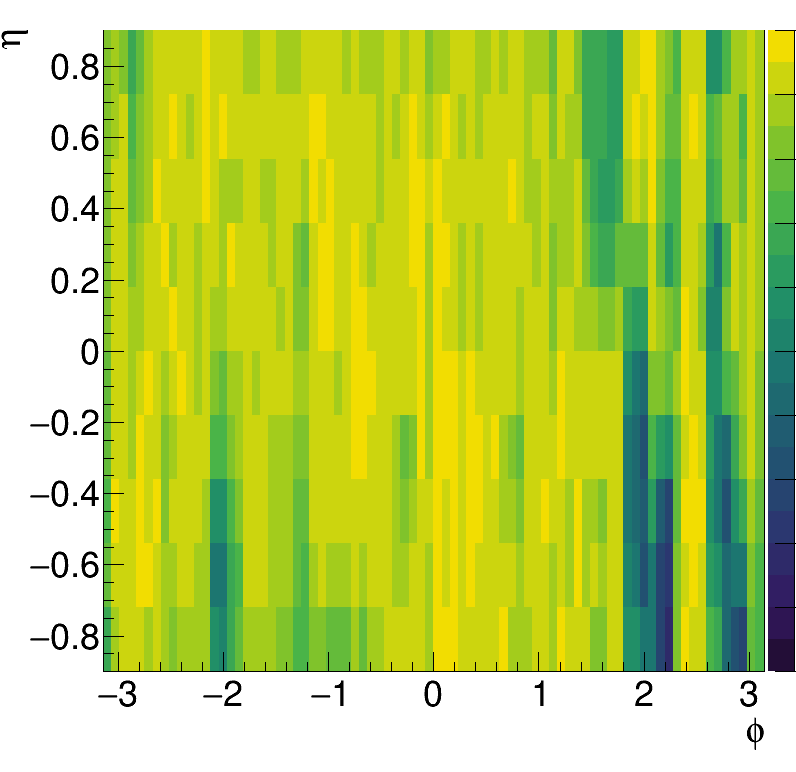

In [72]:
hRecoTruth_etaphi = MCfile.Get('hRecoTruth_phiEta')
hTruth_etaphi = MCfile.Get('hTruth_phiEta')

h2DEff = hRecoTruth_etaphi.Clone()
h2DEff.Divide(hTruth_etaphi)
h2DEff.SetTitle(';#phi;#eta;#epsilon')
#h2DEff.GetZaxis().SetLimits(0.0,1.0)
h2DEff.SetMinimum(0)
h2DEff.SetMaximum(1)

print hRecoTruth_etaphi.GetNbinsX()

c= ROOT.TCanvas('c','c',800,800)

h2DEff.Draw('COLZ')
c.Draw()
#c.SaveAs('etaPhi_eff_5layers_pp.png')

80
69.0716698766


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


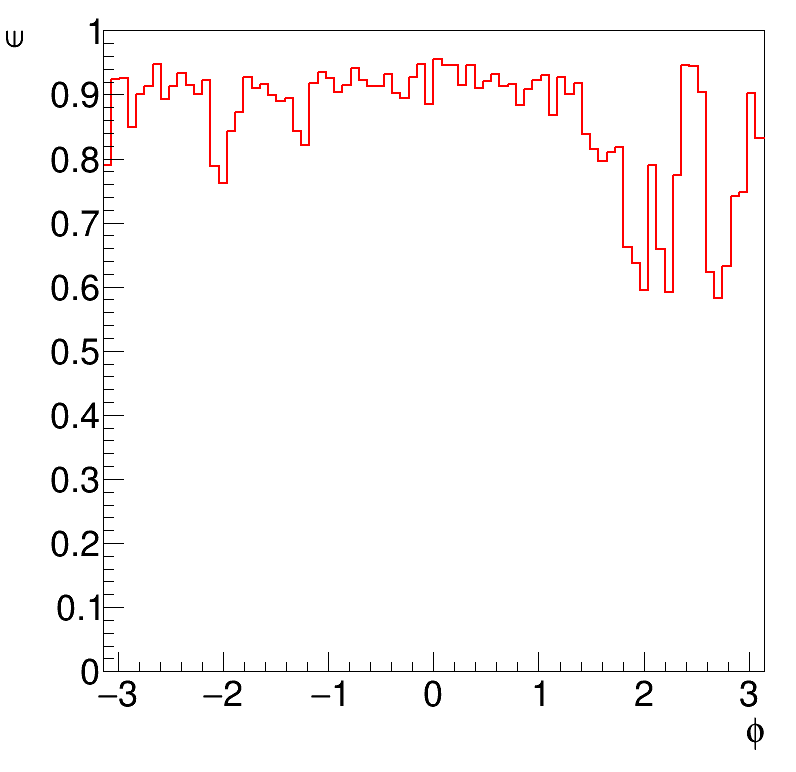

In [73]:
hReco_phi = MCfile.Get('hReco_phi')
hRecoTruth_phi = MCfile.Get('hRecoEmbed_phi')
hTruth_phi = MCfile.Get('hTruth_phi')
hPhi_data = Datafile.Get('hReco_phi')
hPhi_eff = hRecoTruth_phi.Clone()
hPhi_eff.Divide(hTruth_phi)
#hPhi_eff = h2DEff.ProjectionX()

hPhi_data_cor = hPhi_data.Clone()

hPhi_eff.SetMinimum(0)
hPhi_eff.SetMaximum(1)
hPhi_eff.SetTitle(";#phi;#epsilon")
hPhi_eff.SetLineColor(ROOT.kRed)
c= ROOT.TCanvas('c','c',800,800)
                
hPhi_eff.Draw('hist')
c.Draw()
#c.SaveAs('ITS_5layer_phiEff_pp.png')

print hPhi_data.GetNbinsX()
print hPhi_eff.Integral()

for i in range(hPhi_data.GetNbinsX()):
    dPhi = hPhi_data.GetBinWidth(i+1)
    dN = hPhi_data.GetBinContent(i+1)
    dN_dPhi = dN/dPhi
    eff = hPhi_eff.GetBinContent(i+1)
    hPhi_data.SetBinContent(i+1,dN_dPhi)
    hPhi_data_cor.SetBinContent(i+1,dN_dPhi/eff)
    #print dPhi, dN, dN_dPhi, eff

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


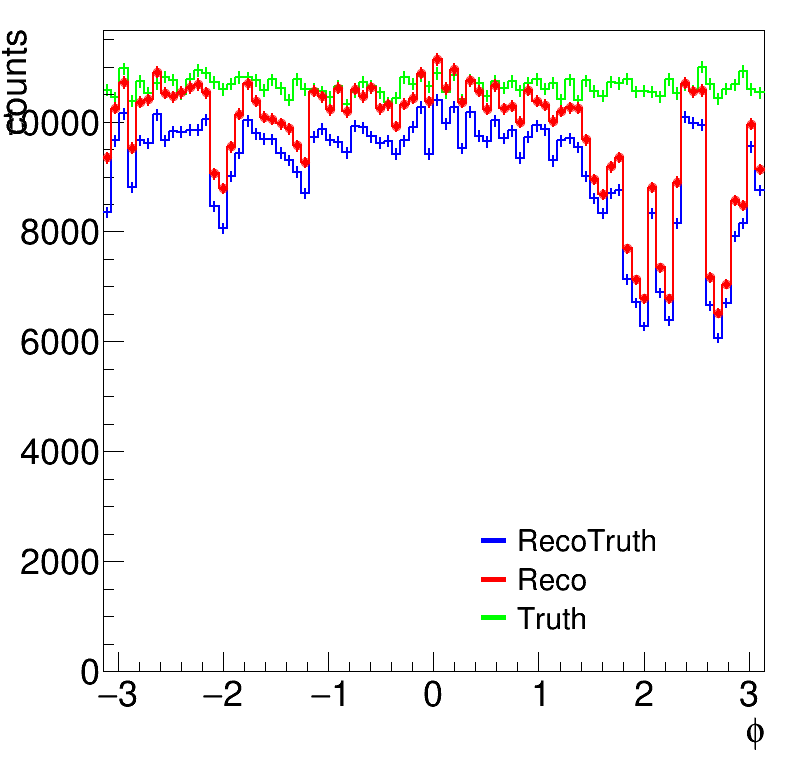

In [74]:
hReco_phi.SetLineColor(ROOT.kRed)
hReco_phi.SetMinimum(0)
hReco_phi.SetTitle(";#phi;counts")
hRecoTruth_phi.SetLineColor(ROOT.kBlue)
hRecoTruth_phi.SetMinimum(0)
hRecoTruth_phi.SetTitle(";#phi;counts")
hTruth_phi.SetLineColor(ROOT.kGreen)
hTruth_phi.SetMinimum(0)
hTruth_phi.SetTitle(";#phi;counts")

c= ROOT.TCanvas('c','c',800,800)
                
#hPhi_eff.Draw('hist')
hTruth_phi.Draw('histe')
hRecoTruth_phi.Draw('histesame')
hReco_phi.Draw('histesame')
label = Legend("")
label.Add(hRecoTruth_phi, 'RecoTruth','L')
label.Add(hReco_phi, 'Reco','L')
label.Add(hTruth_phi, 'Truth','L')
label.Draw(0.6,0.35)
c.Draw()
#c.SaveAs('ITS_5layer_phiRT_pp.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


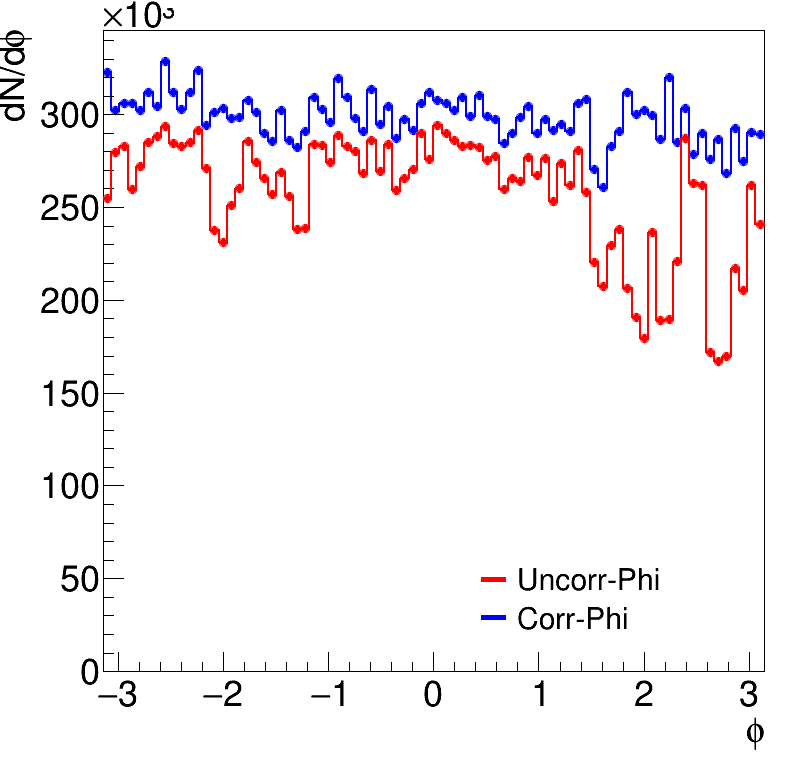

In [75]:
hPhi_data.SetTitle(';#phi;dN/d#phi')
hPhi_data.SetLineColor(ROOT.kRed)
hPhi_data.SetMarkerStyle(20)
hPhi_data.SetMarkerColor(ROOT.kRed)
hPhi_data.SetMinimum(0.0)
hPhi_data_cor.SetTitle(';#phi;dN/d#phi')
hPhi_data_cor.SetLineColor(ROOT.kBlue)
hPhi_data_cor.SetMarkerStyle(20)
hPhi_data_cor.SetMarkerColor(ROOT.kBlue)
hPhi_data_cor.SetMinimum(0.0)

c= ROOT.TCanvas('c','c',800,800)
hPhi_data_cor.Draw('histe')
hPhi_data.Draw('histesame')

label = Legend("")
label.Add(hPhi_data, 'Uncorr-Phi','L')
label.Add(hPhi_data_cor, 'Corr-Phi','L')
label.Draw(0.6,0.3)

c.Draw()
#c.SaveAs('phi_efficiency_cor_5layer_pps.png')

In [69]:
c

<ROOT.TCanvas object ("c") at 0x5bc05f0>